In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [126]:
data = pd.read_csv(r'..\data\Churn_Modelling.csv')
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [127]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [128]:
print(data.shape)

(10000, 11)


# Data Analyis & Visualisation

## Country-wise distribution

In [129]:
countries = set(list(data['Geography']))
countries

{'France', 'Germany', 'Spain'}

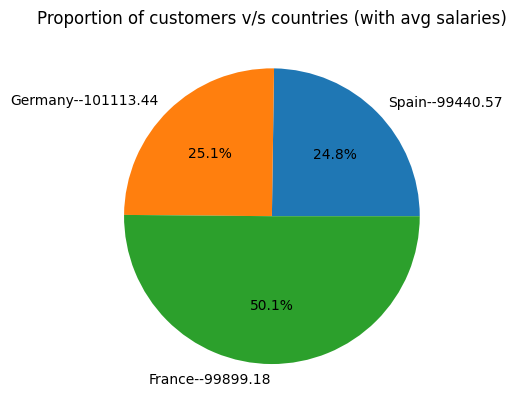

In [130]:
d = {}
for i in countries:
    d[i] = list(data['Geography']).count(i)

avg_salaries = []
for i in countries:
    avg_salaries.append(round(data[data['Geography'] == i]['EstimatedSalary'].mean(),2))

labels = list(d.keys())
for i in range(len(labels)):
    labels[i] = labels[i] + '--' + str(avg_salaries[i])

plt.pie(d.values(), labels=labels, autopct='%1.1f%%')
plt.title('Proportion of customers v/s countries (with avg salaries)')
plt.show()

## Gender-wise distribution

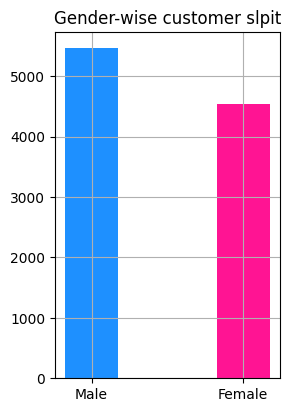

In [131]:
l = list(data['Gender'])
males, females = l.count('Male'),l.count('Female')

plt.figure(figsize=(3,4))
plt.bar(['Male','Female'],height=[males,females], width=0.35, color=['dodgerblue','deeppink'], align='center')
plt.grid()
plt.tight_layout()
plt.title('Gender-wise customer slpit')
plt.show()

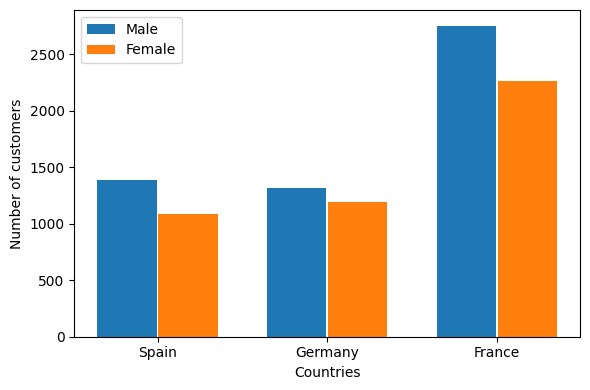

In [144]:
males, females = [],[]
X = list(countries)
X_axis = np.arange(len(X))

for i in X:
    gender_data = list(data[data['Geography']==i]['Gender'])
    males.append(gender_data.count('Male'))
    females.append(gender_data.count('Female'))

plt.figure(figsize=(6,4))
plt.xticks(X_axis, X)
plt.bar(X_axis-0.18, males, width = 0.35, label='Male')
plt.bar(X_axis+0.18, females, width=0.35, label='Female')
plt.legend()
plt.xlabel('Countries')
plt.ylabel('Number of customers')
plt.tight_layout()
plt.show()

## Age distribution

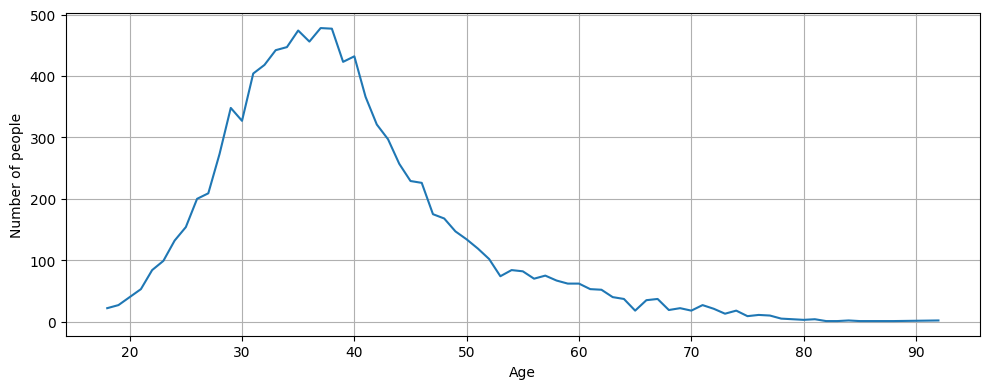

In [164]:
ages = list(data['Age'])
unique_ages = set(ages)
d = {}
for i in unique_ages:
    d[i] = ages.count(i)

plt.figure(figsize=(10,4))
plt.plot(d.keys(),d.values())
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.grid()
plt.tight_layout()
plt.show()

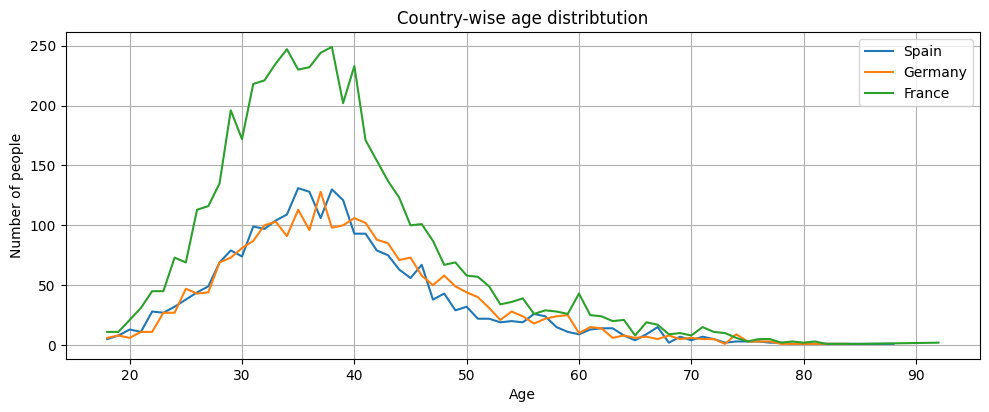

In [165]:
# Country-wise Age Distribution

countries = list(set(list(data['Geography'])))
plt.figure(figsize=(10,4))

for i in countries:
    age_data = list(data[data['Geography']==i]['Age'])
    unique_ages = set(age_data)
    d = {}
    for j in unique_ages:
        d[j] = age_data.count(j)

    plt.plot(d.keys(),d.values(), label=i)
    plt.xlabel('Age')
    plt.ylabel('Number of people')
    plt.grid()
    plt.tight_layout()
plt.title('Country-wise age distribtution')
plt.legend()
plt.show()